In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import edward as ed
import numpy as np
import tensorflow as tf


In [2]:

from edward.models import Bernoulli, Beta
ed.set_seed(42)


In [7]:

# DATA
N=20
p0 = 0.2
x_data = np.random.choice([0,1],N,p=[1-p0,p0])

# MODEL
p = Beta(a=1.0, b=1.0)
x = Bernoulli(p=tf.ones(N) * p)
xmsk = tf.gather(x,np.arange(N))

In [8]:
# INFERENCE
qp_a = tf.nn.softplus(tf.Variable(tf.random_normal([])))
qp_b = tf.nn.softplus(tf.Variable(tf.random_normal([])))
qx = Bernoulli(p=tf.nn.sigmoid(tf.Variable(tf.zeros(N))))
qp = Beta(a=qp_a, b=qp_b)

inference = ed.KLqp({p: qp}, data={xmsk: x_data})
inference.run(n_iter=500)

500/500 [100%] ██████████████████████████████ Elapsed: 0s | Loss: 0.000


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 107.,  101.,  115.,   97.,   99.,   91.,   98.,  103.,   90.,   99.]),
 array([  2.57558422e-04,   1.00194359e-01,   2.00131159e-01,
          3.00067960e-01,   4.00004761e-01,   4.99941561e-01,
          5.99878362e-01,   6.99815162e-01,   7.99751963e-01,
          8.99688763e-01,   9.99625564e-01]),
 <a list of 10 Patch objects>)

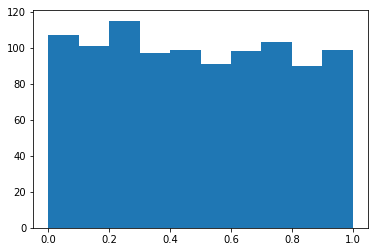

In [10]:
plt.hist(qp.sample(1000).eval())

In [18]:
np.arange(N)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [27]:
qp_a.eval()

2.8804543